## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read preprocessed CSV into dataframe

In [2]:
locations = pd.read_csv('data/processed/c101.csv')
locations.head(10)

Unnamed: 0  CustomerNO   Lng   Lat  Demand  ReadyTime     Due  ServiceTime
0           0           1  40.0  50.0     0.0        0.0  1236.0          0.0
1           1           2  45.0  68.0    10.0      912.0   967.0         90.0
2           2           3  45.0  70.0    30.0      825.0   870.0         90.0
3           3           4  42.0  66.0    10.0       65.0   146.0         90.0
4           4           5  42.0  68.0    10.0      727.0   782.0         90.0
5           5           6  42.0  65.0    10.0       15.0    67.0         90.0
6           6           7  40.0  69.0    20.0      621.0   702.0         90.0
7           7           8  40.0  66.0    20.0      170.0   225.0         90.0
8           8           9  38.0  68.0    20.0      255.0   324.0         90.0
9           9          10  38.0  70.0    10.0      534.0   605.0         90.0

## Plot locations
### Remove depot from locations to plot it as an own point

In [3]:
depot = locations.iloc[0]

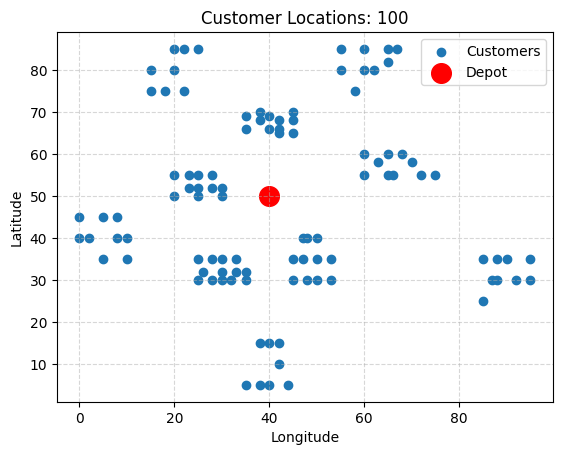

In [4]:
plt.title(f'Customer Locations: {len(locations) - 1}')
plt.scatter(locations.iloc[1:]['Lng'], locations.iloc[1:]['Lat'])
plt.scatter(depot['Lng'], depot['Lat'], color='red', s=200)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(['Customers', 'Depot'])
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## Run ACO algorithm

In [5]:
from sia.aco import ACO, ACOParameters

n_locations = len(locations)
alpha = 0.9
beta = 2.0
evaporation_rate = 0.5

n_vehicles_aco = 25
n_iterations_aco = 100
max_capacity_aco = 100

# Initialize parameters and ACO algorithm
aco_params = ACOParameters(n_locations=n_locations, alpha=alpha, beta=beta, evaporation_rate=evaporation_rate)
aco = ACO(locations_df=locations, n_vehicles=n_vehicles_aco, n_iterations=n_iterations_aco, aco_params=aco_params, max_capacity=max_capacity_aco)

# Run ACO
vehicle_solutions_aco, best_distances_aco, time_window_violations_aco, max_customers_visited_aco, total_distances_aco, best_solution_index_aco = aco.run_loop()

______________________________________________ITERATION 1______________________________________________
VEHICLE 1
Visiting customer 20 with current time 0.0, travel time 10.0, demand 10.0
Arrived on time at 20
Remaining capacity 90.0, unvisited customers: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
Visiting customer 24 with current time 100.0, travel time 5.0, demand 10.0
Arrived on time at 24
Remaining capacity 80.0, unvisited customers: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 

## Print and plot results

Best solution (Index: 7)
Route 1: 20 -> 24 -> 25 -> 27 -> 29 -> 30 -> 9 | Distance travelled: 71.14 | Time window violations: 0
Route 2: 67 -> 65 -> 63 -> 62 -> 72 | Distance travelled: 99.89 | Time window violations: 1
Route 3: 43 -> 42 -> 41 -> 40 -> 44 -> 46 -> 45 | Distance travelled: 53.74 | Time window violations: 0
Route 4: 32 -> 33 -> 31 -> 35 | Distance travelled: 82.09 | Time window violations: 0
Route 5: 15 -> 16 -> 14 -> 26 | Distance travelled: 139.02 | Time window violations: 1
Route 6: 98 -> 96 -> 95 -> 94 -> 92 -> 61 | Distance travelled: 125.33 | Time window violations: 0
Route 7: 5 -> 3 -> 7 -> 8 -> 10 -> 11 -> 28 | Distance travelled: 63.73 | Time window violations: 0
Route 8: 47 | Distance travelled: 86.06 | Time window violations: 1
Route 9: 90 -> 87 -> 86 -> 83 -> 82 -> 84 -> 89 | Distance travelled: 122.80 | Time window violations: 1
Route 10: 13 -> 17 -> 18 -> 19 -> 73 -> 77 | Distance travelled: 190.62 | Time window violations: 0
Route 11: 57 -> 55 -> 54 -> 59 

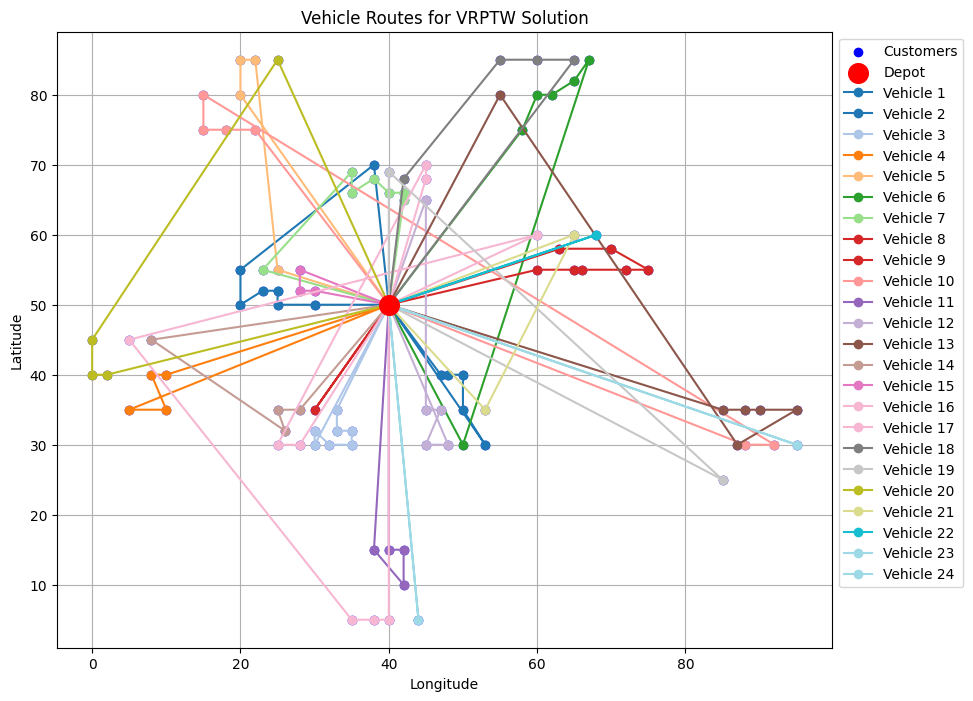

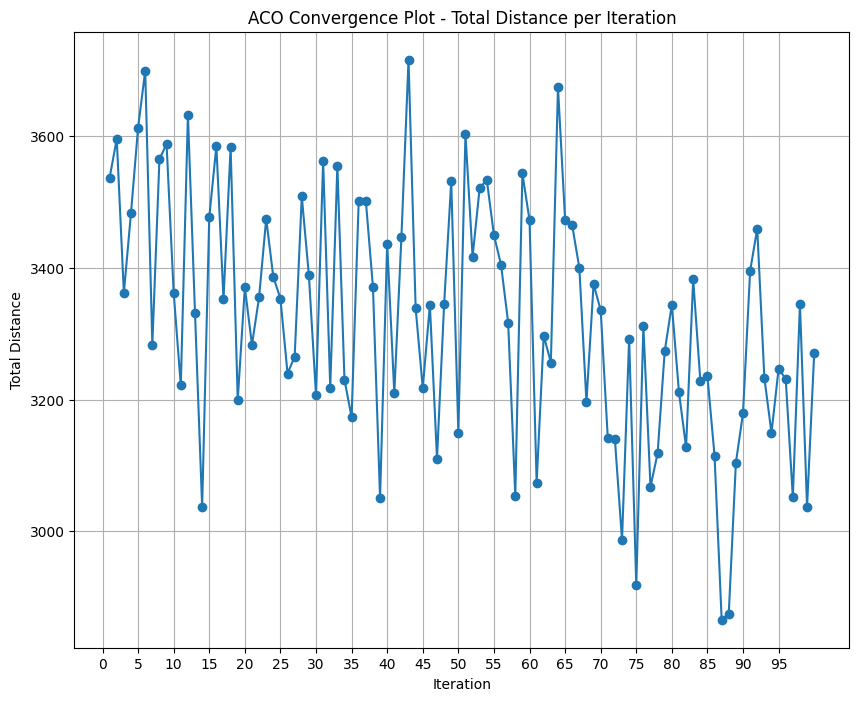

In [6]:
from utils.plotters.solution_visualizer import print_solutions, plot_vehicle_routes, plot_convergence

print_solutions(vehicle_solutions_aco, best_distances_aco, time_window_violations_aco, max_customers_visited_aco, best_solution_index_aco)
plot_vehicle_routes(locations, vehicle_solutions_aco)
plot_convergence(total_distances_aco, n_iterations_aco)

## Run PSO algorithm

In [7]:
from sia.pso import PSO, PSOParameters

n_particles = 10
c1 = 2
c2 = 2
inertia_weight = 0.9

n_vehicles_pso = 25
n_iterations_pso = 100
max_capacity_pso = 100

# Initialize parameters and ACO algorithm
pso_parameters = PSOParameters(n_particles=n_particles, c1=c1, c2=c2, inertia_weight=inertia_weight)
pso = PSO(locations_df=locations, n_vehicles=n_vehicles_pso, n_iterations=n_iterations_pso, pso_parameters=pso_parameters, max_capacity=max_capacity_pso)

# Run ACO
best_routes_pso, best_distances_pso, time_window_violations_pso, max_customers_visited_pso, total_distances_pso, best_solution_index_pso = pso.optimize()

print("Best Position (solution):", best_routes_pso)
print("Best Cost:", best_distances_pso)

Initialized routes with 25 vehicles: [[0, 17, 18, 19, 15, 14, 0], [0, 2, 1, 75, 0], [0, 71, 70, 73, 77, 79, 80, 69, 0], [0, 54, 53, 56, 59, 0], [0, 64, 68, 66, 47, 0], [0, 95, 94, 93, 100, 0], [0, 58, 60, 48, 50, 52, 49, 0], [0, 61, 51, 22, 21, 0], [0, 83, 82, 84, 85, 89, 91, 0], [0, 16, 12, 4, 0], [0, 43, 42, 41, 40, 44, 45, 23, 0], [0, 92, 97, 99, 0], [0, 76, 88, 34, 0], [0, 36, 0], [0, 32, 33, 31, 35, 0], [0, 46, 26, 0], [0, 37, 38, 39, 0], [0, 55, 72, 28, 6, 0], [0, 67, 65, 63, 62, 30, 0], [0, 5, 3, 7, 8, 9, 0], [0, 29, 11, 0], [0, 10, 0], [0, 13, 27, 74, 0], [0, 78, 86, 0], [0, 24, 25, 0]]
Initialized routes with 25 vehicles: [[0, 12, 4, 1, 75, 0], [0, 15, 16, 14, 26, 0], [0, 20, 21, 47, 0], [0, 24, 25, 27, 28, 23, 49, 0], [0, 83, 82, 84, 85, 89, 91, 0], [0, 80, 69, 0], [0, 5, 3, 7, 8, 9, 6, 99, 0], [0, 51, 50, 52, 0], [0, 64, 68, 66, 0], [0, 18, 19, 11, 2, 0], [0, 44, 45, 48, 22, 0], [0, 77, 79, 0], [0, 92, 93, 97, 59, 0], [0, 53, 56, 58, 60, 0], [0, 73, 88, 34, 0], [0, 62, 74, 7

Best solution (Index: 7)
Route 1: 2 -> 1 -> 75 | Distance travelled: 107.24 | Time window violations: 1
Route 2: 56 -> 58 -> 60 -> 59 -> 68 | Distance travelled: 168.22 | Time window violations: 1
Route 3: 51 -> 50 -> 52 -> 49 -> 47 | Distance travelled: 171.45 | Time window violations: 2
Route 4: 22 -> 21 | Distance travelled: 134.56 | Time window violations: 2
Route 5: 10 -> 11 -> 9 -> 6 -> 4 -> 91 -> 69 | Distance travelled: 307.87 | Time window violations: 4
Route 6: 85 -> 88 -> 89 -> 66 | Distance travelled: 146.68 | Time window violations: 1
Route 7: 61 -> 64 -> 23 | Distance travelled: 182.38 | Time window violations: 2
Route 8: 43 -> 42 -> 41 -> 40 -> 44 -> 45 -> 48 -> 34 | Distance travelled: 270.33 | Time window violations: 3
Route 9: 84 -> 99 | Distance travelled: 224.76 | Time window violations: 2
Route 10: 12 | Distance travelled: 164.24 | Time window violations: 1
Route 11: 39 -> 36 | Distance travelled: 216.02 | Time window violations: 2
Route 12: 7 -> 8 -> 26 -> 80 | Di

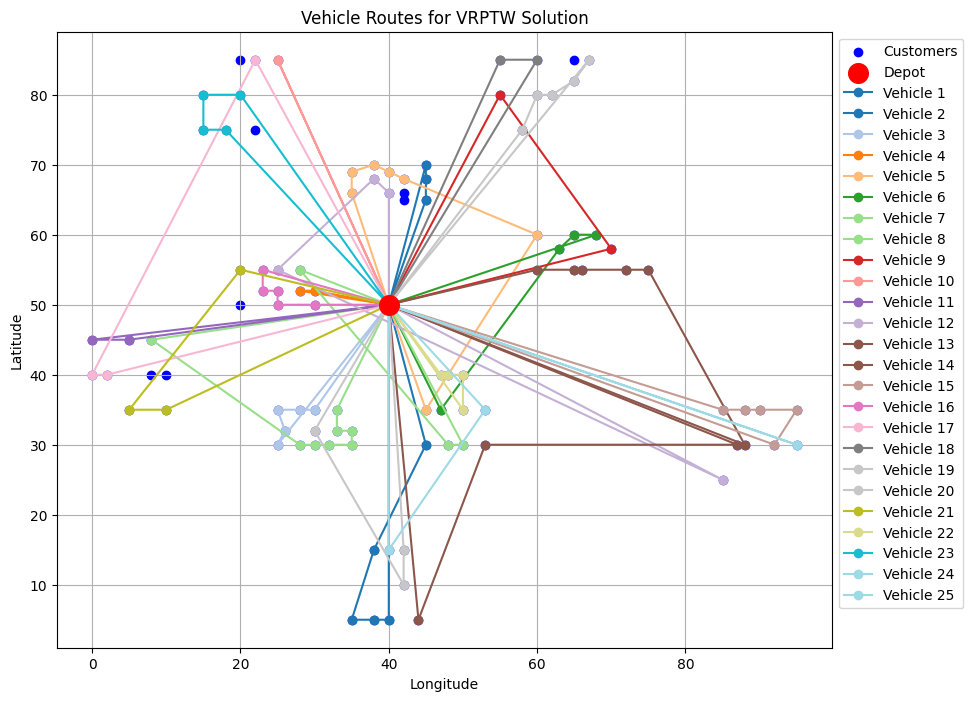

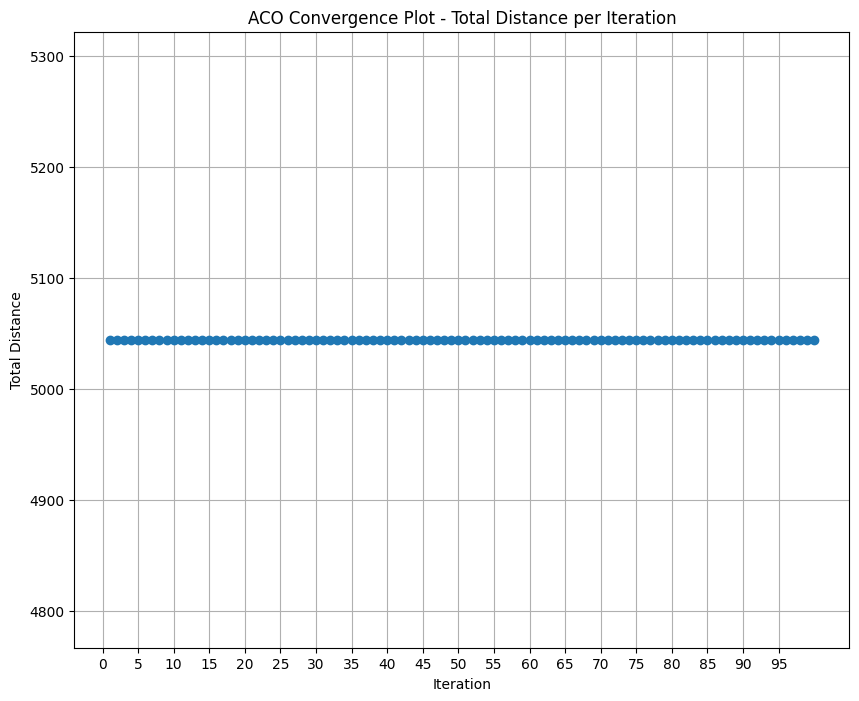

In [9]:
print_solutions(best_routes_pso, best_distances_pso, time_window_violations_pso, max_customers_visited_pso, best_solution_index_pso)
plot_vehicle_routes(locations, best_routes_pso)
plot_convergence(total_distances_pso, n_iterations_pso)